In [1]:
! nvidia-smi

Sun Oct  1 07:45:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## EasyOCR

In [2]:
! pip install easyocr

In [4]:
! wget https://raw.githubusercontent.com/ywchiu/largitdata/master/data/S__26296431.jpg

--2023-10-01 07:50:54--  https://raw.githubusercontent.com/ywchiu/largitdata/master/data/S__26296431.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 367893 (359K) [image/jpeg]
Saving to: ‘S__26296431.jpg’

S__26296431.jpg     100%[===================>] 359.27K  --.-KB/s    in 0.03s   

2023-10-01 07:50:55 (13.1 MB/s) - ‘S__26296431.jpg’ saved [367893/367893]



In [5]:
import easyocr
reader = easyocr.Reader(['ch_tra'])
result = reader.readtext('S__26296431.jpg')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [6]:
result

[([[409, 556], [906, 556], [906, 635], [409, 635]],
  '樂子美式餐廳-新竹',
  0.9848746864934832),
 ([[297, 641], [477, 641], [477, 709], [297, 709]],
  '剌; 45',
  0.050384818422841204),
 ([[608, 640], [716, 640], [716, 714], [608, 714]], '消單', 0.02134889615085434),
 ([[299, 731], [381, 731], [381, 773], [299, 773]], '日期;', 0.8485471565272972),
 ([[401, 731], [657, 731], [657, 773], [401, 773]],
  '2023/09/30 11;04',
  0.7358697077233668),
 ([[691, 733], [807, 733], [807, 775], [691, 775]],
  '來客數:',
  0.9964130520820618),
 ([[845, 739], [865, 739], [865, 767], [845, 767]], '2', 0.9994613657717686),
 ([[295, 767], [380, 767], [380, 811], [295, 811]], '單號:', 0.912884693748951),
 ([[401, 767], [581, 767], [581, 807], [401, 807]],
  '23093080006',
  0.5204167460632799),
 ([[693, 769], [809, 769], [809, 811], [693, 811]], '點單人:', 0.952987015247345),
 ([[829, 769], [887, 769], [887, 809], [829, 809]],
  '門$',
  0.034458107154676273),
 ([[329, 839], [575, 839], [575, 927], [329, 927]],
  '瑪麟鯽',
  0.0

## PaddleOCR

In [ ]:
! pip install paddlepaddle-gpu

In [ ]:
! pip install "paddleocr>=2.0.1"

In [2]:
!wget http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb

--2023-10-01 07:56:59--  http://nz2.archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb
Resolving nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)... 91.189.91.81, 91.189.91.82, 185.125.190.39, ...
Connecting to nz2.archive.ubuntu.com (nz2.archive.ubuntu.com)|91.189.91.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321244 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  2.48MB/s    in 0.5s    

2023-10-01 07:56:59 (2.48 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb’ saved [1321244/1321244]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 120895 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2.19_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2.19) ...
debconf: unable to initialize fronten

In [3]:
from paddleocr import PaddleOCR, draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang="ch")
img_path = 'S__26296431.jpg'
result = ocr.ocr(img_path, cls=True)

download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:02<00:00, 2.31MiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:15<00:00, 687kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:03<00:00, 654kiB/s]

[2023/10/01 07:57:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

[2023/10/01 07:57:55] ppocr DEBUG: dt_boxes num : 20, elapsed : 6.706655979156494
[2023/10/01 07:57:55] ppocr DEBUG: cls num  : 20, elapsed : 0.09666585922241211
[2023/10/01 07:57:55] ppocr DEBUG: rec_res num  : 20, elapsed : 0.12660670280456543


In [4]:
result

[[[[[418.0, 568.0], [897.0, 573.0], [896.0, 621.0], [417.0, 616.0]],
   ('樂子美式餐廳-新竹', 0.9204254150390625)],
  [[[304.0, 644.0], [476.0, 644.0], [476.0, 704.0], [304.0, 704.0]],
   ('桌号：45', 0.9262040853500366)],
  [[[607.0, 640.0], [714.0, 636.0], [718.0, 713.0], [610.0, 717.0]],
   ('消費單', 0.8233658671379089)],
  [[[306.0, 735.0], [417.0, 735.0], [417.0, 769.0], [306.0, 769.0]],
   ('日期：2', 0.9723095893859863)],
  [[[402.0, 735.0], [652.0, 735.0], [652.0, 767.0], [402.0, 767.0]],
   ('2023/09/3011:04', 0.9956249594688416)],
  [[[696.0, 735.0], [868.0, 735.0], [868.0, 772.0], [696.0, 772.0]],
   ('來客數：2', 0.9604523777961731)],
  [[[301.0, 772.0], [577.0, 772.0], [577.0, 804.0], [301.0, 804.0]],
   ('單号：230930B0006', 0.9607647657394409)],
  [[[698.0, 772.0], [885.0, 772.0], [885.0, 809.0], [698.0, 809.0]],
   ('點單人：POS', 0.9426824450492859)],
  [[[340.0, 846.0], [564.0, 846.0], [564.0, 917.0], [340.0, 917.0]],
   ('現磨美式熱咖啡', 0.8841689229011536)],
  [[[808.0, 858.0], [840.0, 858.0], [840

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download


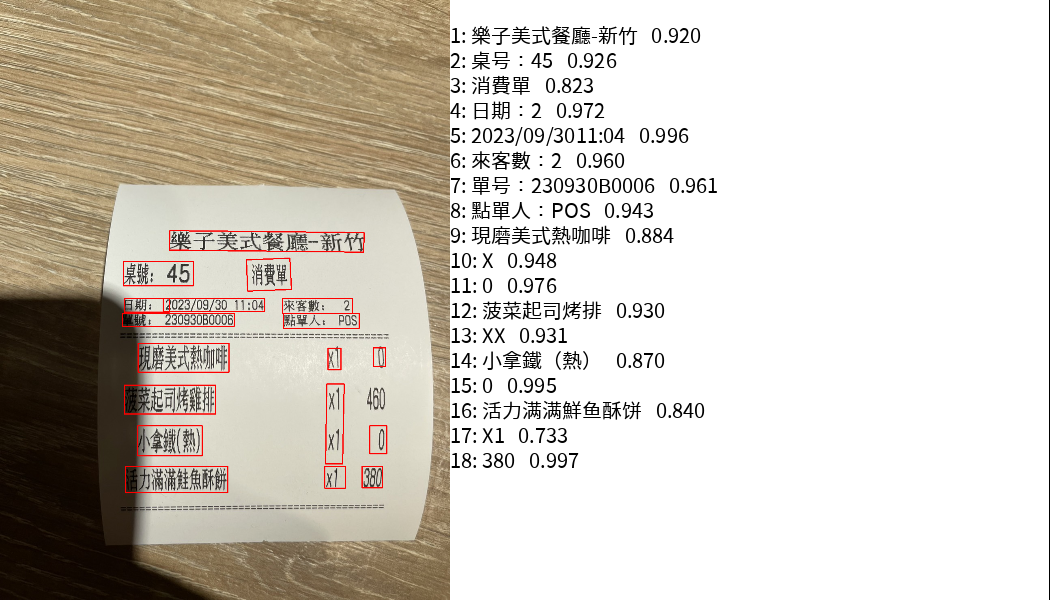

In [6]:
from PIL import Image
res = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in res]
txts = [line[1][0] for line in res]
scores = [line[1][1] for line in res]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./TaipeiSansTCBeta-Regular.ttf')
im_show = Image.fromarray(im_show)
im_show

In [7]:
! wget https://raw.githubusercontent.com/ywchiu/largitdata/master/data/ocr_sample3.jpg

--2023-10-01 08:02:04--  https://raw.githubusercontent.com/ywchiu/largitdata/master/data/ocr_sample3.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67234 (66K) [image/jpeg]
Saving to: ‘ocr_sample3.jpg’

ocr_sample3.jpg     100%[===================>]  65.66K  --.-KB/s    in 0.01s   

2023-10-01 08:02:04 (4.47 MB/s) - ‘ocr_sample3.jpg’ saved [67234/67234]



[2023/10/01 08:02:34] ppocr DEBUG: dt_boxes num : 10, elapsed : 0.03923916816711426
[2023/10/01 08:02:34] ppocr DEBUG: cls num  : 10, elapsed : 0.0190737247467041
[2023/10/01 08:02:34] ppocr DEBUG: rec_res num  : 10, elapsed : 0.06861376762390137


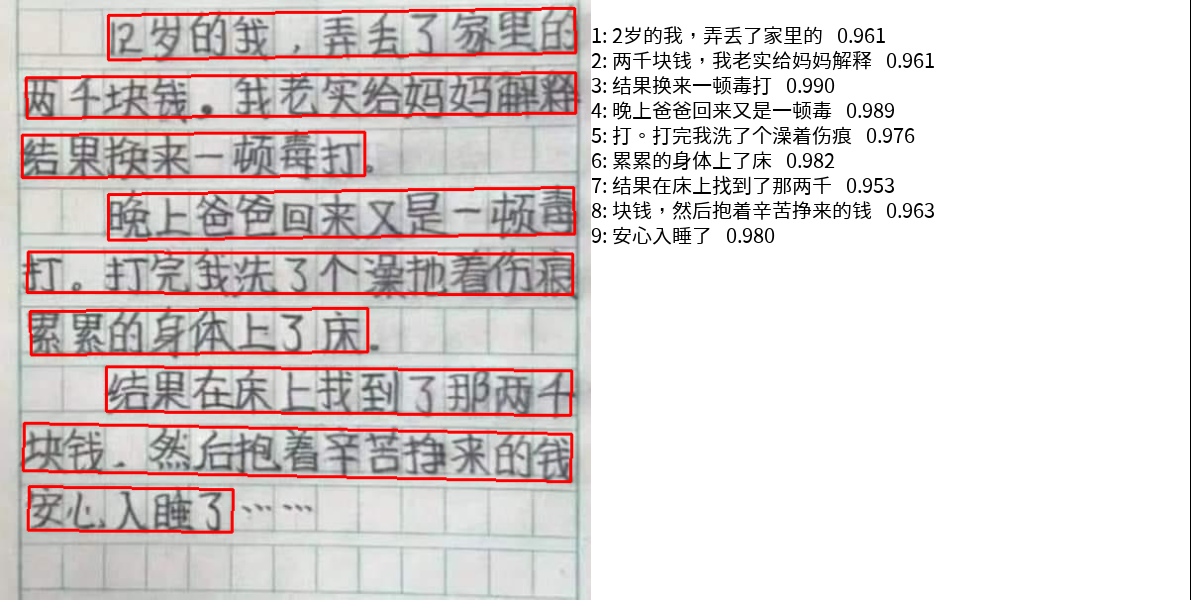

In [8]:
img_path = 'ocr_sample3.jpg'
result = ocr.ocr(img_path, cls=True)
res = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in res]
txts = [line[1][0] for line in res]
scores = [line[1][1] for line in res]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./TaipeiSansTCBeta-Regular.ttf')
im_show = Image.fromarray(im_show)
im_show

In [9]:
! wget https://raw.githubusercontent.com/ywchiu/largitdata/master/data/S__26304584.jpg

--2023-10-01 08:03:33--  https://raw.githubusercontent.com/ywchiu/largitdata/master/data/S__26304584.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 396123 (387K) [image/jpeg]
Saving to: ‘S__26304584.jpg’

S__26304584.jpg     100%[===================>] 386.84K  --.-KB/s    in 0.03s   

2023-10-01 08:03:34 (12.1 MB/s) - ‘S__26304584.jpg’ saved [396123/396123]



[2023/10/01 08:03:50] ppocr DEBUG: dt_boxes num : 9, elapsed : 0.07839751243591309
[2023/10/01 08:03:50] ppocr DEBUG: cls num  : 9, elapsed : 0.03838968276977539
[2023/10/01 08:03:50] ppocr DEBUG: rec_res num  : 9, elapsed : 0.05005764961242676


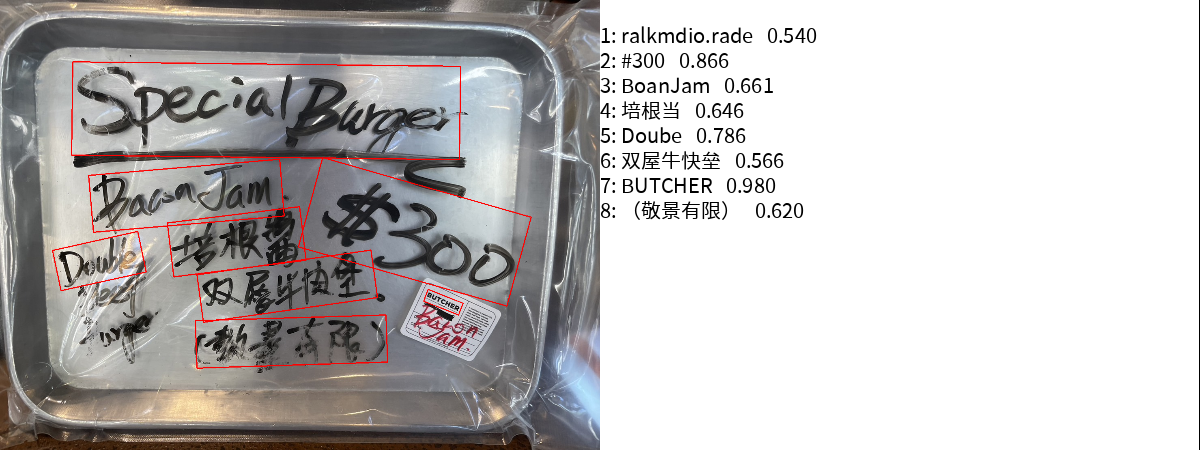

In [10]:
img_path = 'S__26304584.jpg'
result = ocr.ocr(img_path, cls=True)
res = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in res]
txts = [line[1][0] for line in res]
scores = [line[1][1] for line in res]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./TaipeiSansTCBeta-Regular.ttf')
im_show = Image.fromarray(im_show)
im_show